MARKET SEGMENTATION

In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [497]:
import pandas as pd
mcdonalds=pd.read_csv("mcdonalds.csv")

In [498]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [499]:
mcdonalds.shape

(1453, 15)

In [500]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [501]:
age_summary = mcdonalds["Age"].describe()

print("Summary of Age:")
print(age_summary)

Summary of Age:
count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64


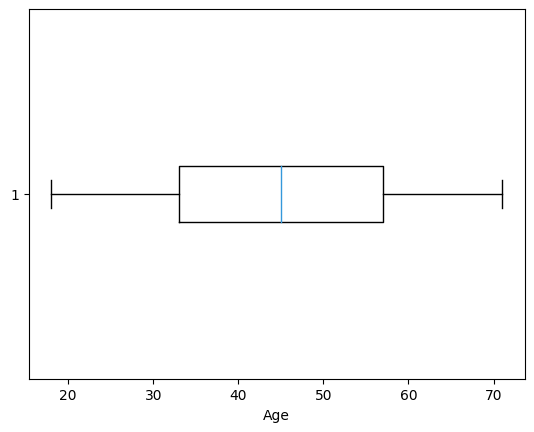

In [502]:
import matplotlib.pyplot as plt

plt.boxplot(mcdonalds["Age"], vert=False)
plt.xlabel("Age")
plt.show()

In [503]:
like_counts = mcdonalds["Like"].value_counts().sort_index()

print("Sorted Income Counts:")
print(like_counts)

Sorted Income Counts:
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64


In [504]:
MD_x = mcdonalds.iloc[:, 0:].copy()

MD_x = (MD_x == "Yes").astype(int).to_numpy()
MD2_x=[MD_x.copy,mcdonalds.iloc[:,12:].copy()]
MD_x

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [505]:
MD2_x

[<function ndarray.copy>,
       Age      VisitFrequency  Gender
 0      61  Every three months  Female
 1      51  Every three months  Female
 2      62  Every three months  Female
 3      69         Once a week  Female
 4      49        Once a month    Male
 ...   ...                 ...     ...
 1448   47         Once a year    Male
 1449   36         Once a week  Female
 1450   52        Once a month  Female
 1451   41  Every three months    Male
 1452   30  Every three months    Male
 
 [1453 rows x 3 columns]]

In [506]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
col_means = np.round(np.mean(MD_x, axis=0), 2)

scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
pca = PCA()
MD_pca = pca.fit_transform(MD_x_scaled)

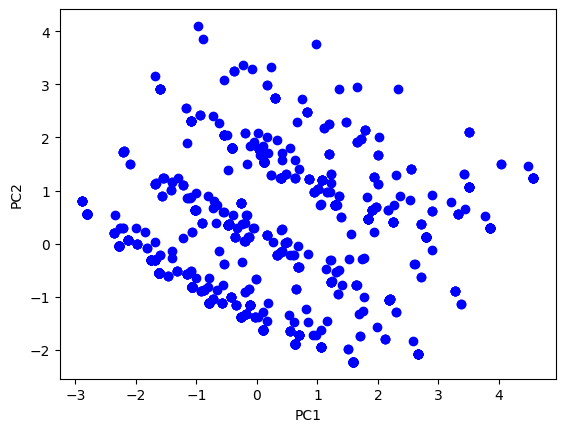

In [507]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

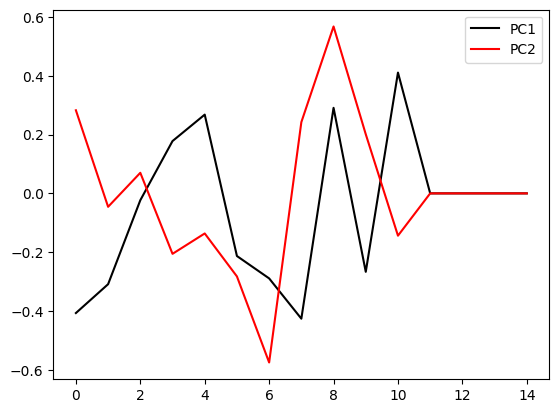

In [508]:
plt.plot(pca.components_[0], color='black', label='PC1')
plt.plot(pca.components_[1], color='red', label='PC2')
plt.legend()
plt.show()

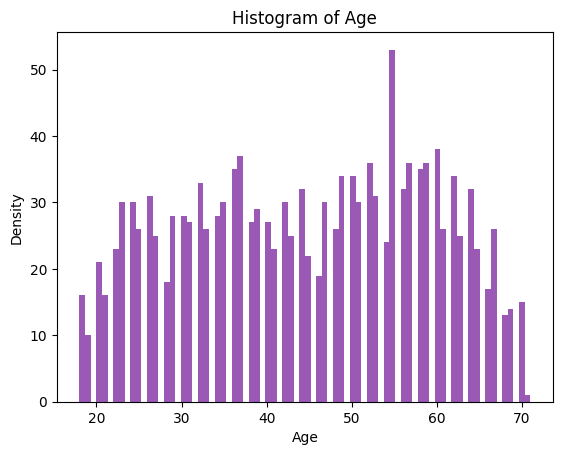

In [509]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(mcdonalds["Age"], bins=80)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Histogram of Age")
plt.show()

C:\Users\Devasoth Pavan Kumar\AppData\Local\Temp\ipykernel_16696\2706880064.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3')


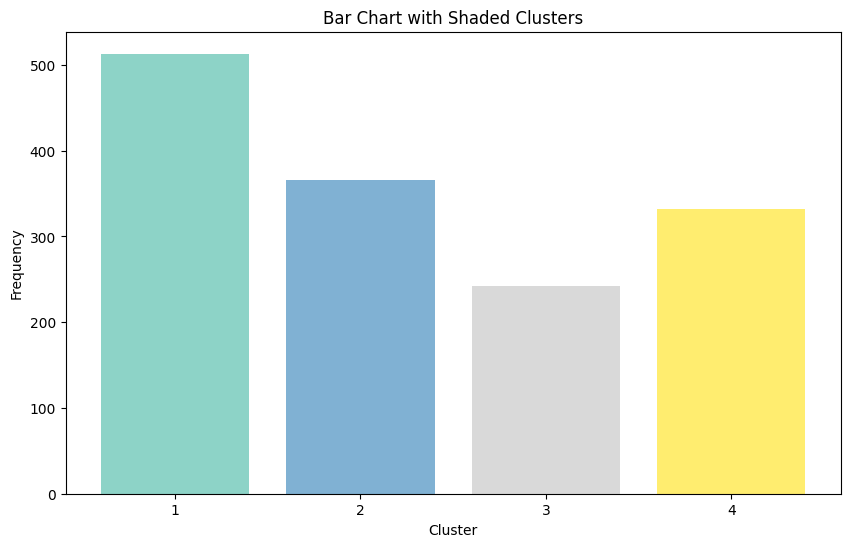

In [510]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
kmeans.fit(MD_x)
MD_k4_labels = kmeans.labels_

# Calculate the cluster counts
cluster_counts = np.bincount(MD_k4_labels)

# Create a colormap
cmap = plt.cm.get_cmap('Set3')

# Plot the bar chart with shaded clusters
plt.figure(figsize=(10, 6))
bar_positions = np.arange(1, len(cluster_counts) + 1)
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(cluster_counts))]
plt.bar(bar_positions, cluster_counts, color=bar_colors)

# Adjust tick locations and labels
plt.xticks(bar_positions, [int(x) for x in bar_positions])

# Set the axis labels and title
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.title("Bar Chart with Shaded Clusters")

plt.show()

C:\Users\Devasoth Pavan Kumar\AppData\Local\Temp\ipykernel_16696\4213907717.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))


<Figure size 800x600 with 0 Axes>

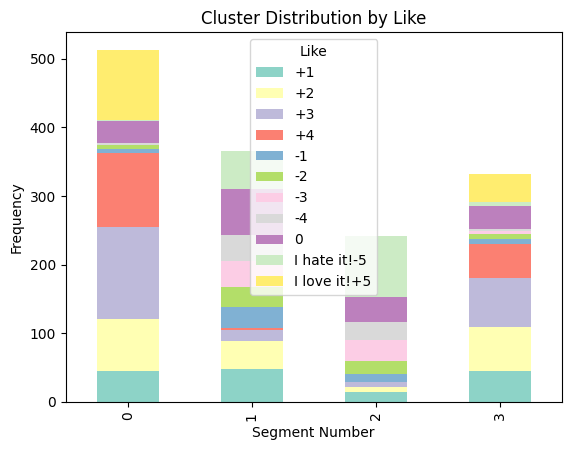

In [511]:
#Step 7: Decribing Segments
import matplotlib.pyplot as plt

# Get the cluster distribution
cluster_counts = np.bincount(MD_k4_labels)

# Get the "Like" column from the original data
like_column = mcdonalds['Like']

# Calculate the frequency of each combination of cluster and "Like"
cluster_like_counts = pd.crosstab(MD_k4_labels, like_column)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, cluster_like_counts.shape[1]))
cluster_like_counts.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title
plt.xlabel("Segment Number")
plt.ylabel("Frequency")
plt.title("Cluster Distribution by Like")

plt.show()

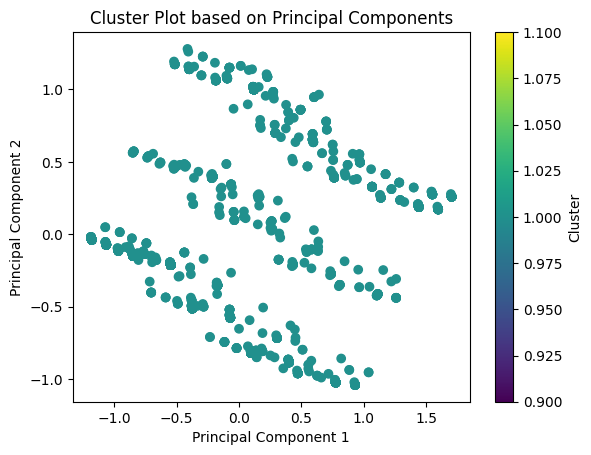

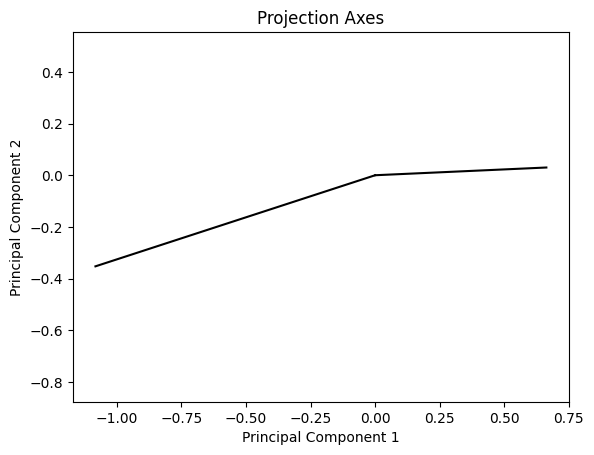

In [512]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'MD.k4' is the vector of cluster assignments
# Assuming 'MD.pca' is the PCA object
# Assuming 'MD.x' is the data matrix

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Create a scatter plot of the clusters
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Plot based on Principal Components')
plt.colorbar(label='Cluster')
plt.show()

# Display the projection axes
plt.figure()
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], 'k-')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection Axes')
plt.axis('equal')
plt.show()

In [513]:
#step 7
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(1234)

# Perform k-means clustering with 2 to 8 clusters
k_values = range(2, 9)
inertia_values = []
labels = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)
    if k == 4:
        labels = kmeans.labels_

# Relabel the clusters
unique_labels = np.unique(labels)
relabel_map = {label: i+1 for i, label in enumerate(unique_labels)}
relabelled_labels = np.vectorize(relabel_map.get)(labels)

# Get the labels for k=4
k4 = relabelled_labels[1:4]

c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

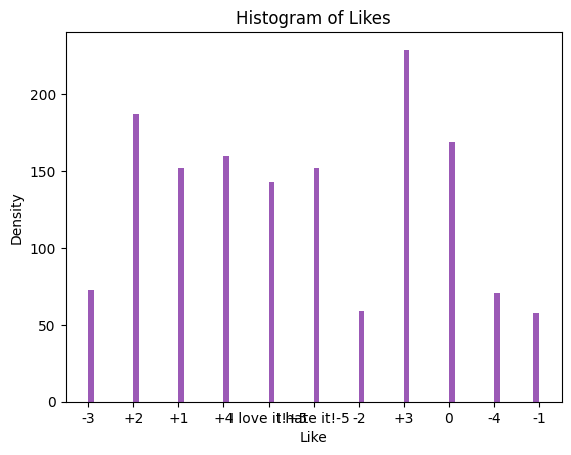

In [514]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(mcdonalds["Like"], bins=80)
plt.xlabel("Like")
plt.ylabel("Density")
plt.title("Histogram of Likes")
plt.show()

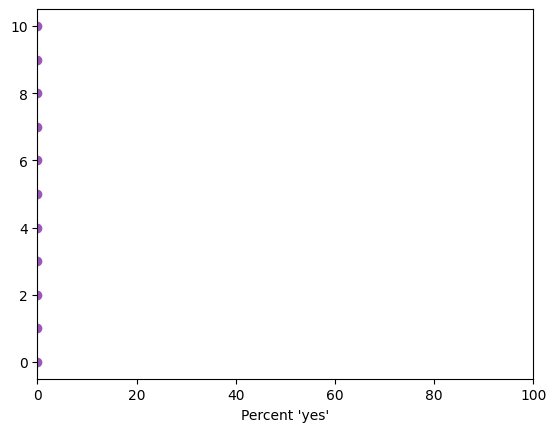

In [515]:
import matplotlib.pyplot as plt

yes = 100 * (mcdonalds.iloc[:, 0:11] == "yes").mean()
sorted_yes = yes.sort_values()

plt.scatter(sorted_yes, range(len(sorted_yes)))
plt.xlabel("Percent 'yes'")
plt.xlim(0, 100)
plt.show()

c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

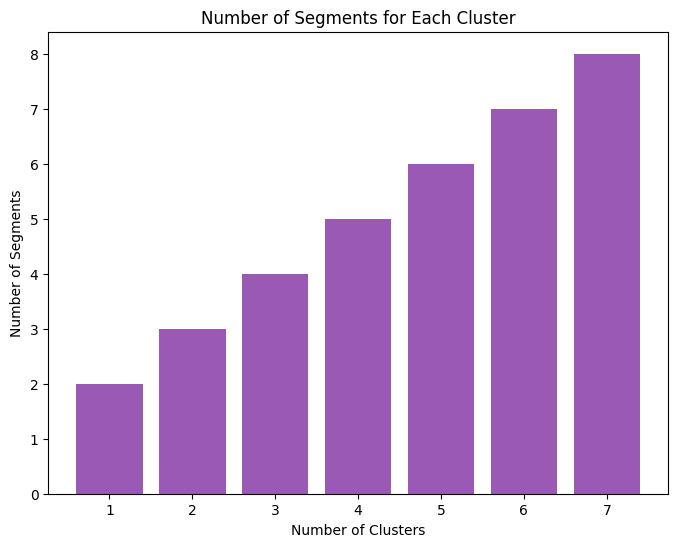

In [516]:
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state


# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Set random seed
random_state = check_random_state(1234)

# Perform stepFlexclust with different number of clusters
segmentations = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(MD_x_scaled)
    segmentations.append(kmeans.labels_)

# Get the number of segments for each cluster
n_segments = [len(np.unique(seg)) for seg in segmentations]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(1,8), n_segments)
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Segments')
plt.title('Number of Segments for Each Cluster')
plt.show()

c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

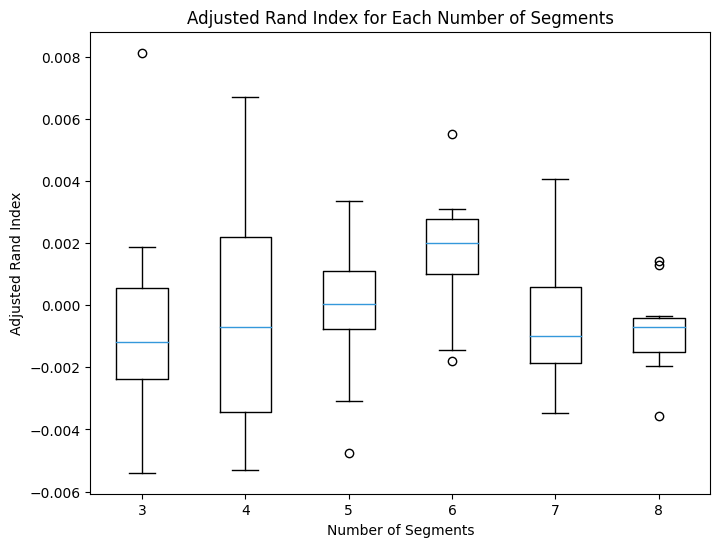

In [517]:
from sklearn.utils import check_random_state
from sklearn.metrics import adjusted_rand_score
import seaborn as sns 


adjusted_Rand = []
clusters_range = range(3, 9)
rand_scores = []
for n_clusters in clusters_range:
    for _ in range(10):
        bootstrap_indices = random_state.choice(MD_x_scaled.shape[0], size=MD_x_scaled.shape[0], replace=True)
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(MD_x_scaled[bootstrap_indices])
        rand_scores.append(adjusted_rand_score(kmeans.labels_, kmeans.predict(MD_x_scaled)))
    adjusted_Rand.append(rand_scores)
    rand_scores = []

#create your own color array
my_colors = ["#9b59b6", "#3498db", 
             "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette( my_colors )
# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(adjusted_Rand, labels=clusters_range)

plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Each Number of Segments')
plt.show()

In [518]:
import numpy as np
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Assuming MD_x is the input matrix
# Assuming you want to perform K-means clustering with 2 to 8 clusters
# Assuming you want to perform 10 repetitions
n_clusters_range = range(2, 9)
n_reps = 10

# Perform K-means clustering for each number of clusters
cluster_results = []
for n_clusters in n_clusters_range:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1234, n_init=n_reps)
    clusters = clusterer.fit_predict(MD_x)
    cluster_results.append(clusters)

# Relabel the clusters to ensure consistency
def relabel_clusters(clusters):
    unique_clusters = np.unique(clusters)
    relabeled_clusters = np.zeros_like(clusters)
    for i, cluster in enumerate(unique_clusters):
        relabeled_clusters[clusters == cluster] = i + 1
    return relabeled_clusters

# Relabel the clusters for each number of clusters
MD_KM28 = [relabel_clusters(clusters) for clusters in cluster_results]

In [519]:
MD_k4 = MD_KM28[4]

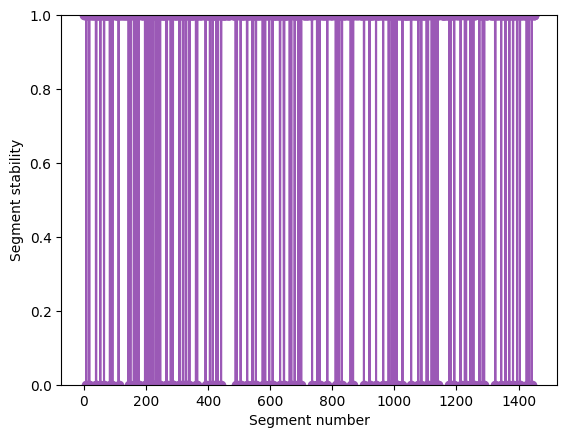

In [520]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(MD_x)

MD_r4 = gmm.predict(MD_x)
import matplotlib.pyplot as plt

plt.plot(range(len(MD_r4)), MD_r4, marker='o')
plt.ylim(0, 1)
plt.xlabel("Segment number")
plt.ylabel("Segment stability")
plt.show()

In [521]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
 
# printing label

In [522]:
# removing the column 'Purchased' from df
# as it is of no use now.


label = le.fit_transform(mcdonalds["yummy"])
mcdonalds.drop("yummy", axis=1, inplace=True)
mcdonalds["yummy"] = label

label = le.fit_transform(mcdonalds["convenient"])
mcdonalds.drop("convenient", axis=1, inplace=True)
mcdonalds["convenient"] = label

label = le.fit_transform(mcdonalds["spicy"])
mcdonalds.drop("spicy", axis=1, inplace=True)
mcdonalds["spicy"] = label

label = le.fit_transform(mcdonalds["fattening"])
mcdonalds.drop("fattening", axis=1, inplace=True)
mcdonalds["fattening"] = label

label = le.fit_transform(mcdonalds["greasy"])
mcdonalds.drop("greasy", axis=1, inplace=True)
mcdonalds["greasy"] = label

label = le.fit_transform(mcdonalds["fast"])
mcdonalds.drop("fast", axis=1, inplace=True)
mcdonalds["fast"] = label

label = le.fit_transform(mcdonalds["cheap"])
mcdonalds.drop("cheap", axis=1, inplace=True)
mcdonalds["cheap"] = label

label = le.fit_transform(mcdonalds["tasty"])
mcdonalds.drop("tasty", axis=1, inplace=True)
mcdonalds["tasty"] = label

label = le.fit_transform(mcdonalds["expensive"])
mcdonalds.drop("expensive", axis=1, inplace=True)
mcdonalds["expensive"] = label

label = le.fit_transform(mcdonalds["healthy"])
mcdonalds.drop("healthy", axis=1, inplace=True)
mcdonalds["healthy"] = label

label = le.fit_transform(mcdonalds["disgusting"])
mcdonalds.drop("disgusting", axis=1, inplace=True)
mcdonalds["disgusting"] = label

label = le.fit_transform(mcdonalds["Gender"])
mcdonalds.drop("Gender", axis=1, inplace=True)
mcdonalds["Gender"] = label

label=mcdonalds["Like"]
mcdonalds.drop("Like", axis=1, inplace=True)
mcdonalds["Like"] = label

label=mcdonalds["Age"]
mcdonalds.drop("Age", axis=1, inplace=True)
mcdonalds["Age"] = label

label=mcdonalds["VisitFrequency"]
mcdonalds.drop("VisitFrequency", axis=1, inplace=True)
mcdonalds["VisitFrequency"] = label
# printing Dataframe
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Gender,Like,Age,VisitFrequency
0,0,1,0,1,0,1,1,0,1,0,0,0,-3,61,Every three months
1,1,1,0,1,1,1,1,1,1,0,0,0,+2,51,Every three months
2,0,1,1,1,1,1,0,1,1,1,0,0,+1,62,Every three months
3,1,1,0,1,1,1,1,1,0,0,1,0,+4,69,Once a week
4,0,1,0,1,1,1,1,0,0,1,0,1,+2,49,Once a month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1,I hate it!-5,47,Once a year
1449,1,1,0,1,0,0,1,1,0,1,0,0,+2,36,Once a week
1450,1,1,0,1,0,1,0,1,1,0,0,0,+3,52,Once a month
1451,1,1,0,0,0,1,1,1,0,1,0,1,+4,41,Every three months


In [523]:
x=mcdonalds.drop(columns={'Like','VisitFrequency'})
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Gender,Age
0,0,1,0,1,0,1,1,0,1,0,0,0,61
1,1,1,0,1,1,1,1,1,1,0,0,0,51
2,0,1,1,1,1,1,0,1,1,1,0,0,62
3,1,1,0,1,1,1,1,1,0,0,1,0,69
4,0,1,0,1,1,1,1,0,0,1,0,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,1,47
1449,1,1,0,1,0,0,1,1,0,1,0,0,36
1450,1,1,0,1,0,1,0,1,1,0,0,0,52
1451,1,1,0,0,0,1,1,1,0,1,0,1,41


In [524]:
y=mcdonalds['Like']
y

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [526]:
model=LogisticRegression()

In [527]:
model.fit(X_train,Y_train)

c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [528]:
y_pred=model.predict(X_test)
y_pred

array(['I love it!+5', '+4', '+3', '+3', '0', 'I love it!+5', '+3', '+2',
       '+3', '+4', '+3', '+4', '+4', '+3', 'I love it!+5', 'I hate it!-5',
       '+3', '0', '+3', 'I hate it!-5', '0', '0', '+3', 'I hate it!-5',
       'I love it!+5', '+3', '+3', '+3', 'I hate it!-5', '+1', '+3', '+2',
       '+2', '0', '0', '+3', '+3', '0', 'I hate it!-5', 'I hate it!-5',
       '+3', '+3', '+3', '0', '+2', '0', '0', '0', '+3', 'I hate it!-5',
       'I hate it!-5', '0', '0', '0', '+4', '+3', '+4', 'I hate it!-5',
       'I hate it!-5', '+3', '+3', '+2', '+2', 'I hate it!-5', '+3',
       'I love it!+5', '+4', '+3', '0', '+3', '+3', '+2', '+3',
       'I hate it!-5', 'I love it!+5', 'I hate it!-5', '+3', '0', '+3',
       '0', '+3', 'I love it!+5', '+3', 'I love it!+5', '+3', '+2',
       'I love it!+5', '+4', '0', '0', '0', '+3', 'I hate it!-5', '0',
       'I hate it!-5', '+3', '+3', '+3', '+3', 'I hate it!-5', '0',
       'I hate it!-5', '+3', 'I hate it!-5', '0', '+4', '+3', '+3',
       

In [529]:
Y_test

737               +1
1185              +4
145               +1
1029               0
810                0
            ...     
743               +1
1141    I love it!+5
1331              +3
1322              +3
470               +3
Name: Like, Length: 291, dtype: object

In [530]:
accuracy_score(y_pred,Y_test)

0.24398625429553264

In [531]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train,Y_train)
result=k.predict(X_test)
print(accuracy_score(Y_test,result))

0.17869415807560138


In [532]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

print(accuracy_score(Y_test,y_pred))

0.24398625429553264


c:\Users\Devasoth Pavan Kumar\Desktop\pp\ML1\mll\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [533]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
y_pred=gbc.predict(X_test)

print(accuracy_score(Y_test,y_pred))

0.19243986254295534
